# Non linear regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Non-linear functions can have elements like exponentials, logarithms, fractions, and so on. For example: $$ y = \log(x)$$

We can have a function that's even more complicated such as :
$$ y = \log(a x^3 + b x^2 + c x + d)$$

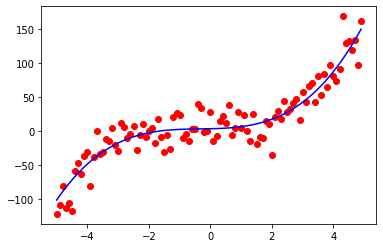

In [16]:
# lets plot cubic function.

x = np.arange(-5, 5, 0.1)

y = x ** 3 + x **2 + x + 3

y_noise = 20 * np.random.normal(size=x.size)

y_data = y + y_noise

plt.plot(x, y_data, 'ro')

plt.plot(x, y, color='blue')

plt.show()

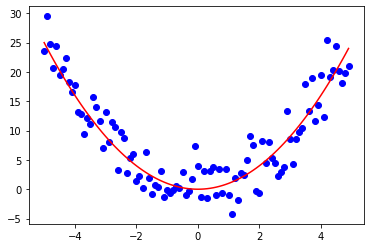

In [20]:
# lets plot quadriatic function.

x = np.arange(-5, 5, 0.1)

y = x ** 2

y_noise = 3 * np.random.normal(size=x.size)

y_data = y + y_noise

plt.plot(x, y_data, 'bo')

plt.plot(x, y, color='r')

plt.show()

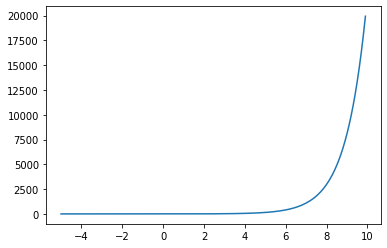

In [21]:
# lets plot exponential function.

x = np.arange(-5, 10, 0.1)

y = np.exp(x)

plt.plot(x, y)

plt.show()

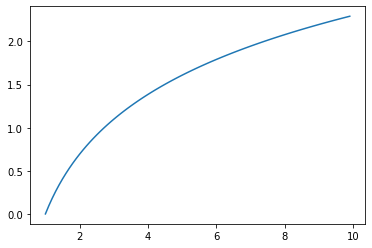

In [22]:
# lets plot logarithmic function.

x = np.arange(1, 10, 0.1)

y = np.log(x)

plt.plot(x, y)

plt.show()

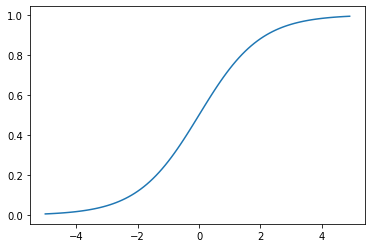

In [28]:
# lets plot Sigmoid function or Logisitic function.

x = np.arange(-5, 5, 0.1)

y = 1 / (1 + np.exp(-1 * x))

plt.plot(x, y)

plt.show()

## Non Linear Regression Example

In [29]:
# downlaoding the data.

!wget -nv -O china_gdp.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv


2022-01-25 18:35:11 URL:https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


In [30]:
# reading the dataset.

df = pd.read_csv('data/china_gdp.csv')

df.head()

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10


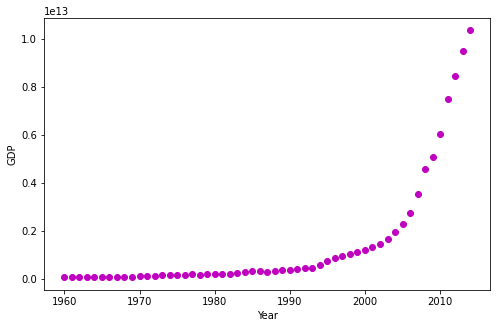

In [35]:
# visualising the dataset.
plt.figure(figsize=(8, 5))

plt.scatter(df['Year'], df['Value'], color='m')

plt.xlabel('Year')

plt.ylabel('GDP')

plt.show()

## so we can try fitting the sigmoid function with parameters beta1 and beta2.

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

In [36]:
def sigmoid(x, beta1, beta2):
    return 1 / (1 + np.exp(-beta1 * (x - beta2)))

In [41]:
x_data = df['Year'].values

y_data = df['Value'].values

# normalizing the data.

x_data = x_data / max(x_data)

y_data = y_data / max(y_data)

In [45]:
# fitting the sigmoid to the data using curve_fit

# curve_fit uses sum of squared residuals to optimize.

# popt -> optimal values of the parameters after optimization.

# pocv -> parameters covariance.

from scipy.optimize import curve_fit

popt, pcov = curve_fit(sigmoid, x_data, y_data)

# print the optimized parameters beta1 and beta2.

print(popt)

[690.45171211   0.99720713]


In [46]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


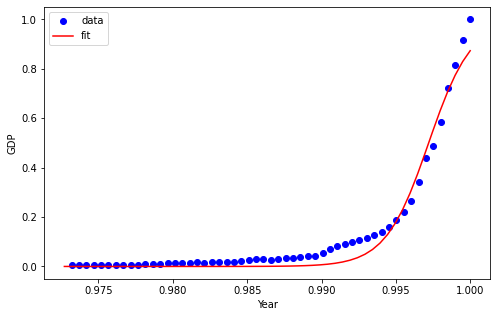

In [55]:
# from year 1960 to 2015. count = 55
x = np.linspace(1960, 2015, 55)

x /= max(x)

plt.figure(figsize=(8, 5))

# plot the data.

plt.plot(x_data, y_data, 'bo', label='data')

# plot the curve

y = sigmoid(x, popt[0], popt[1])

plt.plot(x, y, color='r', label='fit')

plt.xlabel('Year')

plt.ylabel('GDP')

plt.legend()

plt.show()

In [58]:
# Evaluation.

from sklearn.metrics import r2_score

predict_y = sigmoid(x_data, popt[0], popt[1])

print("Mean squared Error (MSE) : ", np.mean((y_data - predict_y) ** 2))

print("R2 score : ", r2_score(predict_y, y_data))

Mean squared Error (MSE) :  0.0015564975055690215
R2 score :  0.9724016820650462
